<a href="https://colab.research.google.com/github/sreej1305/Chromatica/blob/main/Chromatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

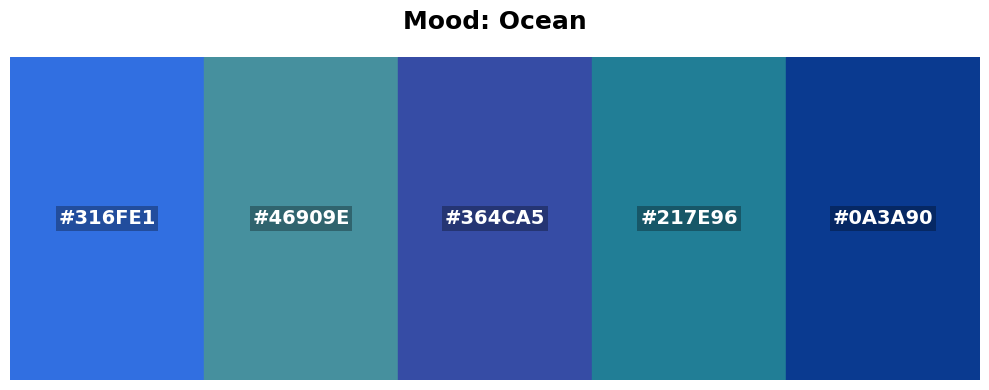

In [3]:
import random
import colorsys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# --- Utility Functions ---
def hsv_to_hex(h, s, v):
    """Converts HSV values (0-1) to HEX format."""
    rgb = colorsys.hsv_to_rgb(h, s, v)
    return '#{:02x}{:02x}{:02x}'.format(
        int(rgb[0] * 255),
        int(rgb[1] * 255),
        int(rgb[2] * 255)
    )
def visualize_palette(colors, mood_word):
    """Displays the color palette as horizontal blocks."""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_axis_off()
    n_colors = len(colors)
    for i, color in enumerate(colors):
        rect = patches.Rectangle((i / n_colors, 0), 1 / n_colors, 1, color=color)
        ax.add_patch(rect)
        ax.text(
            (i + 0.5) / n_colors, 0.5, color.upper(),
            color="white", ha='center', va='center',
            fontsize=14, fontweight='bold',
            bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', pad=2)
        )
    plt.title(f"Mood: {mood_word.capitalize()}", fontsize=18, pad=20, fontweight='bold')
    plt.tight_layout()
    plt.show()
# --- Core Engine ---
class MoodEngine:
    MOODS = {
        "sunset": {"h_range": (0.0, 0.15), "s_range": (0.6, 0.9), "v_range": (0.7, 1.0)},
        "sad": {"h_range": (0.5, 0.7), "s_range": (0.1, 0.4), "v_range": (0.3, 0.5)},
        "cyberpunk": {"h_range": (0.7, 0.95), "s_range": (0.8, 1.0), "v_range": (0.8, 1.0)},
        "calm": {"h_range": (0.4, 0.6), "s_range": (0.2, 0.5), "v_range": (0.7, 0.9)},
        "energetic": {"h_range": (0.05, 0.2), "s_range": (0.8, 1.0), "v_range": (0.8, 1.0)},
        "vibrant": {"h_range": (0.0, 1.0), "s_range": (0.8, 1.0), "v_range": (0.8, 1.0)},
        "forest": {"h_range": (0.25, 0.45), "s_range": (0.4, 0.8), "v_range": (0.2, 0.6)},
        "ocean": {"h_range": (0.5, 0.65), "s_range": (0.5, 1.0), "v_range": (0.4, 0.9)},
    }
    def generate_palette(self, mood, seed=None):
        if seed is not None: random.seed(seed)
        profile = self.MOODS.get(mood.lower(), {"h_range": (0.0, 1.0), "s_range": (0.1, 0.6), "v_range": (0.4, 0.8)})
        return [hsv_to_hex(random.uniform(*profile["h_range"]),
                           random.uniform(*profile["s_range"]),
                           random.uniform(*profile["v_range"])) for _ in range(5)]
# --- Execution ---
engine = MoodEngine()
mood = "ocean" # CHANGE THIS to experiment!
palette = engine.generate_palette(mood)
visualize_palette(palette, mood)